### Data Merge

In [1]:
!pip install --user gensim wordsegment lightgbm

In [2]:
import types
import pandas as pd
import numpy as np
from botocore.client import Config
import ibm_boto3
import io
import warnings
import matplotlib
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore")

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_6a1dd7bf12d24938b55e69a36c33dec7 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ZCw4mPNPhOmn2GpUI0FD59WfQuyCFwQMmusbgjVSpTeF',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_6a1dd7bf12d24938b55e69a36c33dec7.get_object(Bucket='agcwatsonstudioproject-donotdelete-pr-oahdwlxwjnxxjn',Key='Data Requirements for POC_V6_For Vendor.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

#agc_data = pd.read_excel(body)
agc_data = pd.read_excel(io.BytesIO(body.read()))
agc_data.head()



,AG Number,Accused Name,Previous Antecedents?(CRO),TrialORPG?,Imprisonment (Years),Imprisonment (Months),Imprisonment (Weeks),Imprisonment (Days),Fine,Caning (Strokes),Other Sentence,DPP's sentence (left to Court),DPP's Imprisonment (Years),DPP's Imprisonment (Months),DPP's Imprisonment (Weeks),DPP's Imprisonment (Days),DPP's Fine,DPP's Caning (Strokes),DPP's Other Sentence
0,AG-123410-2017,DANIEL BIN FARHAN,Yes,Trial,7,0,0,0,0,0,0.0,Yes,7,0,0,0,0,0,0
1,AG-123436-2017,FARHAN BIN FARHAN,No,Trial,0,5,0,0,0,0,0.0,No,0,6,0,0,0,0,0
2,AG-900261-2019,MUHAMMAD FAZLI BIN AMAT SUNAR,Yes,Mention,0,10,0,0,0,0,0.0,No,0,10,0,0,0,0,0
3,AG-123272-2019,MOHD FARHAN BIN ISMAIL,Yes,Mention,2,11,0,0,0,0,0.0,No,2,11,0,0,0,0,0
4,AG-123403-2019,TONG WOON YEK,Yes,Mention,3,3,0,0,0,0,0.0,No,3,3,0,0,0,0,0


In [3]:
agc_data.shape

(100, 19)

In [4]:
len(np.unique(agc_data['AG Number']))

98

### UC1 Output

In [5]:
body = client_6a1dd7bf12d24938b55e69a36c33dec7.get_object(Bucket='agcwatsonstudioproject-donotdelete-pr-oahdwlxwjnxxjn',Key='520_Final_Rule_ML_v2.csv')['Body']
#body = client_6a1dd7bf12d24938b55e69a36c33dec7.get_object(Bucket='agcwatsonstudioproject-donotdelete-pr-oahdwlxwjnxxjn',Key='520_Final_Rule_ML_v3.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

uc1_output = pd.read_csv(body)
uc1_output.rename(columns = {'Casenumber':'AG Number'}, inplace = True)
uc1_output.head()

,AG Number,Firstpartofoffence,Offenceconnector,Secondpartofoffence,Ageofaccused,Chargenumber,Dateofbirth,Dateofoffence,Drugtype1,Drugweight1,Genderofaccused,Generaltypeofoffence,Hsalabnumber1,Identitynumber,Nationality,Relateddrugtype,Reportnumber,Full offence
0,AG-123412-2019,committed \nan offence under Section 8(a),"['read with', 'punishable under']","['Section 33(1) of the said Act', 'Section 18(...",21 years old,DAC-923855-2019,17/03/1998,14 February 2019,amphetamine,NaN,Male,Drug,ID-1932-0035-007,G9898513L,Malaysia,NaN,A/20190215/2006,committed an offence under Section 8(a) read w...
1,AG-123277-2018,committed an offence,"['punished under', 'punishable under']","Section 379 of the Penal Code, Chapter 224.",30 YEARS OLD,MAC-906605-2018,NaN,01 Jul 2018,NaN,NaN,Male,Others,NaN,S9898038B,Singapore,NaN,G/20180701/0120,committed an offence punished under Section 37...
2,AG-123846-2018,committed an offence under Regulation ...,"['punished under', 'punishable under']",Regulation 15(6)(a) of the aforesaid Regulations,NaN,DAC-925232-2018,11/02/1993,19 Feb 2018,NaN,NaN,Male,Drug,NaN,S9898165H,Singapore,NaN,NaN,committed an offence under Regulation ...
3,AG-123846-2018,committed an offence,punishable under,NaN,NaN,MAC-907928-2018,11/02/1993,NaN,NaN,NaN,Male,Others,NaN,S9898165H,Singapore,NaN,NaN,committed an offence punishable under
4,AG-123333-2019,committed an offence,punishable under,"['Section 325 of the Penal Code', 'Section 325']",56 YEARS OLD,DAC-909174-2019,26MAY1962,21 November 2018,NaN,NaN,Male,Hurt,NaN,F9898169U,Singapore,NaN,NaN,committed an offence punishable under Section ...


In [6]:
merged_data = pd.merge(agc_data,uc1_output,on="AG Number",how="left")
merged_data.tail()

,AG Number,Accused Name,Previous Antecedents?(CRO),TrialORPG?,Imprisonment (Years),Imprisonment (Months),Imprisonment (Weeks),Imprisonment (Days),Fine,Caning (Strokes),...,Drugtype1,Drugweight1,Genderofaccused,Generaltypeofoffence,Hsalabnumber1,Identitynumber,Nationality,Relateddrugtype,Reportnumber,Full offence
544,AG-123344-2018,MUHAMMAD FARIS BIN MOHAMED,Yes,Mention,7,2,2,0,0,11,...,NaN,NaN,Male,Others,NaN,S9898985J,Singapore,NaN,NaN,committed an offence punishable under section ...
545,AG-123344-2018,MUHAMMAD FARIS BIN MOHAMED,Yes,Mention,7,2,2,0,0,11,...,NaN,NaN,Male,Others,NaN,S9898101Z,Singapore,NaN,NaN,committed an offence punishable under
546,AG-123344-2018,MUHAMMAD FARIS BIN MOHAMED,Yes,Mention,7,2,2,0,0,11,...,NaN,NaN,Male,Others,NaN,S9898985J,Singapore,NaN,NaN,committed an offence under Section 35(1) r...
547,AG-123344-2018,MUHAMMAD FARIS BIN MOHAMED,Yes,Mention,7,2,2,0,0,11,...,NaN,NaN,Male,Drug,NaN,S9898985J,Singapore,NaN,NaN,committed an offence punishable under
548,AG-123344-2018,MUHAMMAD FARIS BIN MOHAMED,Yes,Mention,7,2,2,0,0,11,...,NaN,NaN,Male,Others,NaN,NaN,Singapore,NaN,NaN,


In [7]:
merged_data.shape

(549, 36)

In [8]:
import numpy as np
merged_data = merged_data.drop_duplicates()
len(np.unique(merged_data['AG Number']))

98

In [9]:
merged_data.columns

Index(['AG Number', 'Accused Name', 'Previous Antecedents?(CRO)', 'TrialORPG?',
       'Imprisonment (Years)', 'Imprisonment (Months)', 'Imprisonment (Weeks)',
       'Imprisonment (Days)', 'Fine', 'Caning (Strokes)', 'Other Sentence',
       'DPP's sentence (left to Court)', 'DPP's Imprisonment (Years)',
       'DPP's Imprisonment (Months)', 'DPP's Imprisonment (Weeks)',
       'DPP's Imprisonment (Days)', 'DPP's Fine', 'DPP's Caning (Strokes)',
       'DPP's Other Sentence', 'Firstpartofoffence', 'Offenceconnector',
       'Secondpartofoffence', 'Ageofaccused', 'Chargenumber', 'Dateofbirth',
       'Dateofoffence', 'Drugtype1', 'Drugweight1', 'Genderofaccused',
       'Generaltypeofoffence', 'Hsalabnumber1', 'Identitynumber',
       'Nationality', 'Relateddrugtype', 'Reportnumber', 'Full offence'],
      dtype='object')

In [10]:
#pd.DataFrame([uc1_output.isna().sum(),merged_data.isna().sum()]).transpose()

In [11]:
set(merged_data['AG Number'])- set(agc_data['AG Number'])

set()

In [12]:
len(set(merged_data['AG Number']).intersection(set(agc_data['AG Number'])))

98

In [13]:
agc_data['AG Number'].isin(merged_data['AG Number']).value_counts()

True    100
Name: AG Number, dtype: int64

In [14]:
#merged_data.to_csv("UC2_Output.csv",index=False)

In [15]:
# credentials = {
#     'IAM_SERVICE_ID': 'iam-ServiceId-0c9024d2-deba-4c58-9848-94ad54f41312',
#     'IBM_API_KEY_ID': 'ZCw4mPNPhOmn2GpUI0FD59WfQuyCFwQMmusbgjVSpTeF',
#     'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
#     'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
#     'BUCKET': 'agcwatsonstudioproject-donotdelete-pr-oahdwlxwjnxxjn'
# }

In [16]:
#credentials['FILE'] ='UC2_Output.csv'

In [17]:
# cos = ibm_boto3.client(service_name='s3',
#                        ibm_api_key_id=credentials['IBM_API_KEY_ID'],
#                        ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
#                        ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
#                        config=Config(signature_version='oauth'),
#                        endpoint_url=credentials['ENDPOINT'])
# try:
#     res = cos.upload_file(Filename="UC2_Output.csv", Bucket=credentials['BUCKET'], Key="UC2_Output.csv")
# except Exception as e:
#     print(Exception, e)
# else:
#     print('File Uploaded to Cloud Object Storage')

In [18]:
UC2Output = merged_data.copy()

# Exploratory Data Analysis

In [19]:
merged_data.describe()

,Imprisonment (Years),Imprisonment (Months),Imprisonment (Weeks),Imprisonment (Days),Fine,Caning (Strokes),Other Sentence,DPP's Imprisonment (Years),DPP's Imprisonment (Months),DPP's Imprisonment (Weeks),DPP's Imprisonment (Days),DPP's Caning (Strokes)
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,543.0,549.000000,549.000000,549.000000,549.000000,549.000000
mean,4.129326,9.482696,0.426230,13.526412,2548.451730,3.755920,0.0,4.220401,9.788707,0.249545,10.061931,3.373406
std,3.280060,6.280413,1.431057,66.501013,14676.694072,4.189684,0.0,3.518546,6.075782,0.900945,45.723022,4.189937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.000000,0.000000,0.000000,0.000000
50%,5.000000,9.000000,0.000000,0.000000,0.000000,3.000000,0.0,5.000000,9.000000,0.000000,0.000000,0.000000
75%,5.000000,12.000000,0.000000,0.000000,0.000000,6.000000,0.0,6.000000,12.000000,0.000000,0.000000,6.000000
max,14.000000,33.000000,20.000000,413.000000,90000.000000,16.000000,0.0,14.000000,30.000000,6.000000,380.000000,16.000000


In [20]:
merged_data['TrialORPG?'].value_counts()

Mention    493
Trial       56
Name: TrialORPG?, dtype: int64

In [21]:
merged_data= merged_data[merged_data['TrialORPG?']=='Mention']
merged_data.head()

,AG Number,Accused Name,Previous Antecedents?(CRO),TrialORPG?,Imprisonment (Years),Imprisonment (Months),Imprisonment (Weeks),Imprisonment (Days),Fine,Caning (Strokes),...,Drugtype1,Drugweight1,Genderofaccused,Generaltypeofoffence,Hsalabnumber1,Identitynumber,Nationality,Relateddrugtype,Reportnumber,Full offence
2,AG-900261-2019,MUHAMMAD FAZLI BIN AMAT SUNAR,Yes,Mention,0,10,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AG-123272-2019,MOHD FARHAN BIN ISMAIL,Yes,Mention,2,11,0,0,0,0,...,diamorphine,2.32 grams,Male,Drug,ID-1832-02893-001,S9898247H,Singapore,"['vegetable matter', 'vegetable matter']",F/20181210/2120,Section 8(a) of the Misuse of Drugs Act punish...
4,AG-123272-2019,MOHD FARHAN BIN ISMAIL,Yes,Mention,2,11,0,0,0,0,...,NaN,NaN,Male,Drug,NaN,S9898247H,Singapore,NaN,J/20181210/2116,committed an offence under regulation 15(3...
5,AG-123272-2019,MOHD FARHAN BIN ISMAIL,Yes,Mention,2,11,0,0,0,0,...,NaN,NaN,Male,Drug,NaN,S9898247H,Singapore,NaN,J/20181210/2116,committed an offence under regulation 15(3...
6,AG-123272-2019,MOHD FARHAN BIN ISMAIL,Yes,Mention,2,11,0,0,0,0,...,NaN,NaN,Male,Drug,NaN,S9898247H,Singapore,NaN,J/20181210/2116,committed an offence under regulation 15(3...


In [22]:
merged_data.shape

(493, 36)

In [23]:
merged_data.isna().sum()

AG Number                           0
Accused Name                        0
Previous Antecedents?(CRO)          0
TrialORPG?                          0
Imprisonment (Years)                0
Imprisonment (Months)               0
Imprisonment (Weeks)                0
Imprisonment (Days)                 0
Fine                                0
Caning (Strokes)                    0
Other Sentence                      6
DPP's sentence (left to Court)      0
DPP's Imprisonment (Years)          0
DPP's Imprisonment (Months)         0
DPP's Imprisonment (Weeks)          0
DPP's Imprisonment (Days)           0
DPP's Fine                          0
DPP's Caning (Strokes)              0
DPP's Other Sentence                0
Firstpartofoffence                 41
Offenceconnector                   14
Secondpartofoffence                83
Ageofaccused                      132
Chargenumber                        1
Dateofbirth                        90
Dateofoffence                      97
Drugtype1   

### Drop DPP's Predictions and Convert Imprisonment to Calendar Days

In [24]:
merged_data["Imprisonment"] = merged_data['Imprisonment (Years)']*365 +merged_data["Imprisonment (Months)"]*30 + merged_data["Imprisonment (Weeks)"]*7+merged_data["Imprisonment (Days)"]

# merged_data["DPP_Imprisonment"] = merged_data["DPP's Imprisonment (Years)"]*365 +merged_data["DPP's Imprisonment (Months)"]*30 + merged_data["DPP's Imprisonment (Weeks)"]*7+merged_data["DPP's Imprisonment (Days)"]




In [25]:
drop_cols = ['Imprisonment (Years)',"Imprisonment (Months)","Imprisonment (Weeks)","Imprisonment (Days)","DPP's Imprisonment (Years)","DPP's Imprisonment (Months)",
            "DPP's Imprisonment (Weeks)","DPP's Imprisonment (Days)","Reportnumber","Hsalabnumber1","Other Sentence","DPP's Other Sentence","DPP's Caning (Strokes)",
            "DPP's Fine"]
             
merged_data.drop(drop_cols,axis=1,inplace=True)

In [26]:
merged_data.head()

,AG Number,Accused Name,Previous Antecedents?(CRO),TrialORPG?,Fine,Caning (Strokes),DPP's sentence (left to Court),Firstpartofoffence,Offenceconnector,Secondpartofoffence,...,Dateofoffence,Drugtype1,Drugweight1,Genderofaccused,Generaltypeofoffence,Identitynumber,Nationality,Relateddrugtype,Full offence,Imprisonment
2,AG-900261-2019,MUHAMMAD FAZLI BIN AMAT SUNAR,Yes,Mention,0,0,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300
3,AG-123272-2019,MOHD FARHAN BIN ISMAIL,Yes,Mention,0,0,No,"['Section 8(a) of the Misuse of Drugs Act', 'c...","['punished under', 'punished under', 'punishme...","['Section 33(1) of the said \nAct', 'Section ...",...,10 December 2018,diamorphine,2.32 grams,Male,Drug,S9898247H,Singapore,"['vegetable matter', 'vegetable matter']",Section 8(a) of the Misuse of Drugs Act punish...,1060
4,AG-123272-2019,MOHD FARHAN BIN ISMAIL,Yes,Mention,0,0,No,committed an offence under \nregulation 15...,"['punished under', 'punishable under']",regulation 15(6)(a) of the \nMisuse of Drugs,...,03 Jan 2019,NaN,NaN,Male,Drug,S9898247H,Singapore,NaN,committed an offence under regulation 15(3...,1060
5,AG-123272-2019,MOHD FARHAN BIN ISMAIL,Yes,Mention,0,0,No,committed an offence under \nregulation 15...,"['punished under', 'punishable under']",regulation 15(6)(a) of the \nMisuse of Drugs,...,27 December 2018,NaN,NaN,Male,Drug,S9898247H,Singapore,NaN,committed an offence under regulation 15(3...,1060
6,AG-123272-2019,MOHD FARHAN BIN ISMAIL,Yes,Mention,0,0,No,committed an offence under \nregulation 15...,"['punished under', 'punishable under']",regulation 15(6)(a) of the \nMisuse of Drugs,...,07 Jan 2019,NaN,NaN,Male,Drug,S9898247H,Singapore,NaN,committed an offence under regulation 15(3...,1060


In [27]:
column_names = list(merged_data.columns)
column_names

['AG Number',
 'Accused Name',
 'Previous Antecedents?(CRO)',
 'TrialORPG?',
 'Fine',
 'Caning (Strokes)',
 "DPP's sentence (left to Court)",
 'Firstpartofoffence',
 'Offenceconnector',
 'Secondpartofoffence',
 'Ageofaccused',
 'Chargenumber',
 'Dateofbirth',
 'Dateofoffence',
 'Drugtype1',
 'Drugweight1',
 'Genderofaccused',
 'Generaltypeofoffence',
 'Identitynumber',
 'Nationality',
 'Relateddrugtype',
 'Full offence',
 'Imprisonment']

In [28]:
new_column_names = ['AG Number','Accused Name','Previous Antecedents?(CRO)','TrialORPG?',"DPP's sentence (left to Court)",
                    'Firstpartofoffence','Offenceconnector','Secondpartofoffence','Full offence','Ageofaccused',
                    'Chargenumber','Dateofbirth','Dateofoffence','Drugtype1','Drugweight1','Genderofaccused','Generaltypeofoffence','Identitynumber','Nationality',
                    'Relateddrugtype','Imprisonment','Fine','Caning_Strokes']
len(new_column_names)

23

In [29]:
merged_data = merged_data.reindex(columns=new_column_names)
merged_data.head()

,AG Number,Accused Name,Previous Antecedents?(CRO),TrialORPG?,DPP's sentence (left to Court),Firstpartofoffence,Offenceconnector,Secondpartofoffence,Full offence,Ageofaccused,...,Drugtype1,Drugweight1,Genderofaccused,Generaltypeofoffence,Identitynumber,Nationality,Relateddrugtype,Imprisonment,Fine,Caning_Strokes
2,AG-900261-2019,MUHAMMAD FAZLI BIN AMAT SUNAR,Yes,Mention,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300,0,NaN
3,AG-123272-2019,MOHD FARHAN BIN ISMAIL,Yes,Mention,No,"['Section 8(a) of the Misuse of Drugs Act', 'c...","['punished under', 'punished under', 'punishme...","['Section 33(1) of the said \nAct', 'Section ...",Section 8(a) of the Misuse of Drugs Act punish...,NaN,...,diamorphine,2.32 grams,Male,Drug,S9898247H,Singapore,"['vegetable matter', 'vegetable matter']",1060,0,NaN
4,AG-123272-2019,MOHD FARHAN BIN ISMAIL,Yes,Mention,No,committed an offence under \nregulation 15...,"['punished under', 'punishable under']",regulation 15(6)(a) of the \nMisuse of Drugs,committed an offence under regulation 15(3...,NaN,...,NaN,NaN,Male,Drug,S9898247H,Singapore,NaN,1060,0,NaN
5,AG-123272-2019,MOHD FARHAN BIN ISMAIL,Yes,Mention,No,committed an offence under \nregulation 15...,"['punished under', 'punishable under']",regulation 15(6)(a) of the \nMisuse of Drugs,committed an offence under regulation 15(3...,NaN,...,NaN,NaN,Male,Drug,S9898247H,Singapore,NaN,1060,0,NaN
6,AG-123272-2019,MOHD FARHAN BIN ISMAIL,Yes,Mention,No,committed an offence under \nregulation 15...,"['punished under', 'punishable under']",regulation 15(6)(a) of the \nMisuse of Drugs,committed an offence under regulation 15(3...,NaN,...,NaN,NaN,Male,Drug,S9898247H,Singapore,NaN,1060,0,NaN


In [30]:
def age_clean(cols):
    import re
    if type(cols) == str:
        match = re.search(r'\w+',cols)
        return int(match.group(0))    

In [31]:
len(np.unique(merged_data['AG Number']))

85

In [32]:
#merged_data['Ageofaccused']= merged_data['Ageofaccused'].replace(np.nan,0)
merged_data['Ageofaccused'].isna().sum()

132

In [33]:
# merged_data= merged_data.reset_index(drop=True)

In [34]:
#merged_data[['Dateofoffence','Dateofbirth','Ageofaccused']]
#merged_data[merged_data['Ageofaccused'].isna()][['Dateofoffence','Dateofbirth','Ageofaccused']]

In [35]:
merged_data= merged_data.reset_index(drop=True)

merged_data['Dateofbirth'] = merged_data['Dateofbirth'].apply(lambda x:x[-4:] if type(x)==str else x)
merged_data['Dateofoffence'] = merged_data['Dateofoffence'].apply(lambda x:x[-4:] if type(x)==str else x)

merged_data['Dateofbirth'] = merged_data['Dateofbirth'].astype(float)
merged_data['Dateofoffence'] = merged_data['Dateofoffence'].astype(float)

merged_data['Ageofaccused'] = merged_data['Ageofaccused'].apply(age_clean)
merged_data['test'] = merged_data['Ageofaccused']

merged_data['test'] =merged_data['Dateofoffence']-merged_data['Dateofbirth']
merged_data['Ageofaccused'].fillna(merged_data.test, inplace=True)
merged_data.drop(['test','Dateofoffence','Dateofbirth','Firstpartofoffence','Offenceconnector','Secondpartofoffence','Accused Name'],axis=1,inplace=True)

In [36]:
# merged_data['Ageofaccused'] = merged_data['Ageofaccused'].apply(age_clean)
# merged_data['test'] = merged_data['Ageofaccused']
#merged_data['test'].isna().sum()

In [37]:
# merged_data['test'] =merged_data['Dateofoffence']-merged_data['Dateofbirth']
# merged_data['Ageofaccused'].fillna(merged_data.test, inplace=True)
# merged_data.drop(['test','Dateofoffence','Dateofbirth','Firstpartofoffence','Offenceconnector','Secondpartofoffence','Accused Name'],axis=1,inplace=True)

In [38]:
#merged_data[['Dateofoffence','Dateofbirth','Ageofaccused','test']]
merged_data.shape

(493, 17)

In [39]:
#merged_data[merged_data["Ageofaccused"]<20]    

In [40]:
merged_data.head()

,AG Number,Previous Antecedents?(CRO),TrialORPG?,DPP's sentence (left to Court),Full offence,Ageofaccused,Chargenumber,Drugtype1,Drugweight1,Genderofaccused,Generaltypeofoffence,Identitynumber,Nationality,Relateddrugtype,Imprisonment,Fine,Caning_Strokes
0,AG-900261-2019,Yes,Mention,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300,0,NaN
1,AG-123272-2019,Yes,Mention,No,Section 8(a) of the Misuse of Drugs Act punish...,55.0,DAC-909846-2019,diamorphine,2.32 grams,Male,Drug,S9898247H,Singapore,"['vegetable matter', 'vegetable matter']",1060,0,NaN
2,AG-123272-2019,Yes,Mention,No,committed an offence under regulation 15(3...,56.0,DAC-900742-2019,NaN,NaN,Male,Drug,S9898247H,Singapore,NaN,1060,0,NaN
3,AG-123272-2019,Yes,Mention,No,committed an offence under regulation 15(3...,55.0,DAC-900741-2019,NaN,NaN,Male,Drug,S9898247H,Singapore,NaN,1060,0,NaN
4,AG-123272-2019,Yes,Mention,No,committed an offence under regulation 15(3...,56.0,DAC-900743-2019,NaN,NaN,Male,Drug,S9898247H,Singapore,NaN,1060,0,NaN


### Age manipulation

In [41]:
age_dict= {"AG-123344-2018" : 28,"AG-123403-2019" : 52,"AG-123150-2018" : 26}
charge_dict= {"DAC-918469-2019":52,"DAC-918470-2019":52,"DAC-901158-2019":52,"MAC-906285-2019":26,'MAC-906709-2018':28,"MAC-906708-2018":28}

for key in charge_dict.keys():
    merged_data.loc[merged_data.Chargenumber == key,'Ageofaccused'] = charge_dict[key]
    
merged_data[merged_data['Ageofaccused'] <20]

dicts= {}
from collections import Counter
list_ages = set(merged_data[merged_data['Ageofaccused'].isna()]['AG Number'])
unique_list_ages = list(list_ages)
for columns in unique_list_ages:
    value_list= merged_data[merged_data['AG Number'] ==str(columns)]['Ageofaccused']
    b = Counter(value_list)
    value = b.most_common(1)[0][0]
    if not pd.isnull(value):
        dicts[columns] = value
for key in dicts.keys():
    merged_data.loc[merged_data['AG Number'] == key,'Ageofaccused'] = dicts[key]


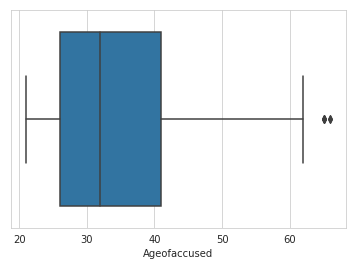

In [42]:
%matplotlib inline
import seaborn as sns
sns.set_style(style="whitegrid")
ax = sns.boxplot(x=merged_data["Ageofaccused"])
ax

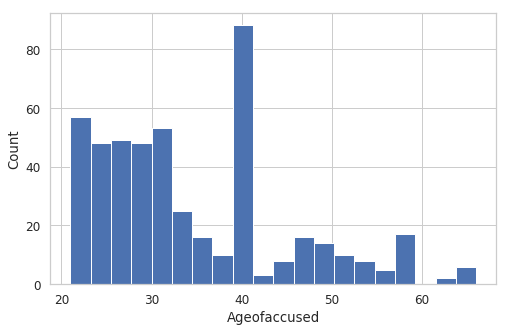

In [43]:
import seaborn as sns
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    merged_data['Ageofaccused'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Ageofaccused', ylabel='Count');

In [44]:
merged_data.columns

Index(['AG Number', 'Previous Antecedents?(CRO)', 'TrialORPG?',
       'DPP's sentence (left to Court)', 'Full offence', 'Ageofaccused',
       'Chargenumber', 'Drugtype1', 'Drugweight1', 'Genderofaccused',
       'Generaltypeofoffence', 'Identitynumber', 'Nationality',
       'Relateddrugtype', 'Imprisonment', 'Fine', 'Caning_Strokes'],
      dtype='object')

In [45]:
# merged_data['DPP\'s Fine']= merged_data['DPP\'s Fine'].apply(lambda x:0 if x=="Fine" else x)
# merged_data['DPP\'s Fine'].value_counts()

In [46]:
# merged_data['DPP\'s Fine'] = merged_data['DPP\'s Fine'].astype(int)

### Categorical and Numerical Masking

In [47]:
categorical_feature_mask = merged_data.dtypes=='object'
categorical_cols = merged_data.columns[categorical_feature_mask].tolist()
categorical_cols

['AG Number',
 'Previous Antecedents?(CRO)',
 'TrialORPG?',
 "DPP's sentence (left to Court)",
 'Full offence',
 'Chargenumber',
 'Drugtype1',
 'Drugweight1',
 'Genderofaccused',
 'Generaltypeofoffence',
 'Identitynumber',
 'Nationality',
 'Relateddrugtype']

In [48]:
numerical_feature_mask = merged_data.dtypes!='object'
numerical_cols = merged_data.columns[numerical_feature_mask].tolist()
numerical_cols

['Ageofaccused', 'Imprisonment', 'Fine', 'Caning_Strokes']

In [49]:
merged_data[numerical_cols].isna().sum()

Ageofaccused       10
Imprisonment        0
Fine                0
Caning_Strokes    493
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7eff26f9b710>,
      dtype=object)

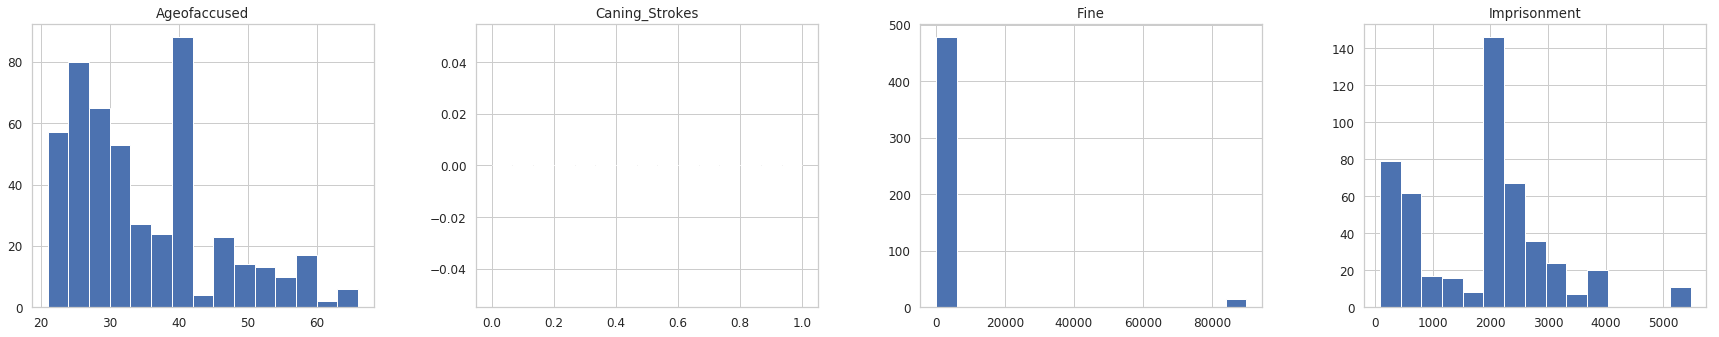

In [50]:
merged_data[numerical_cols].hist(bins=15, figsize=(30,12), layout=(2, 4))

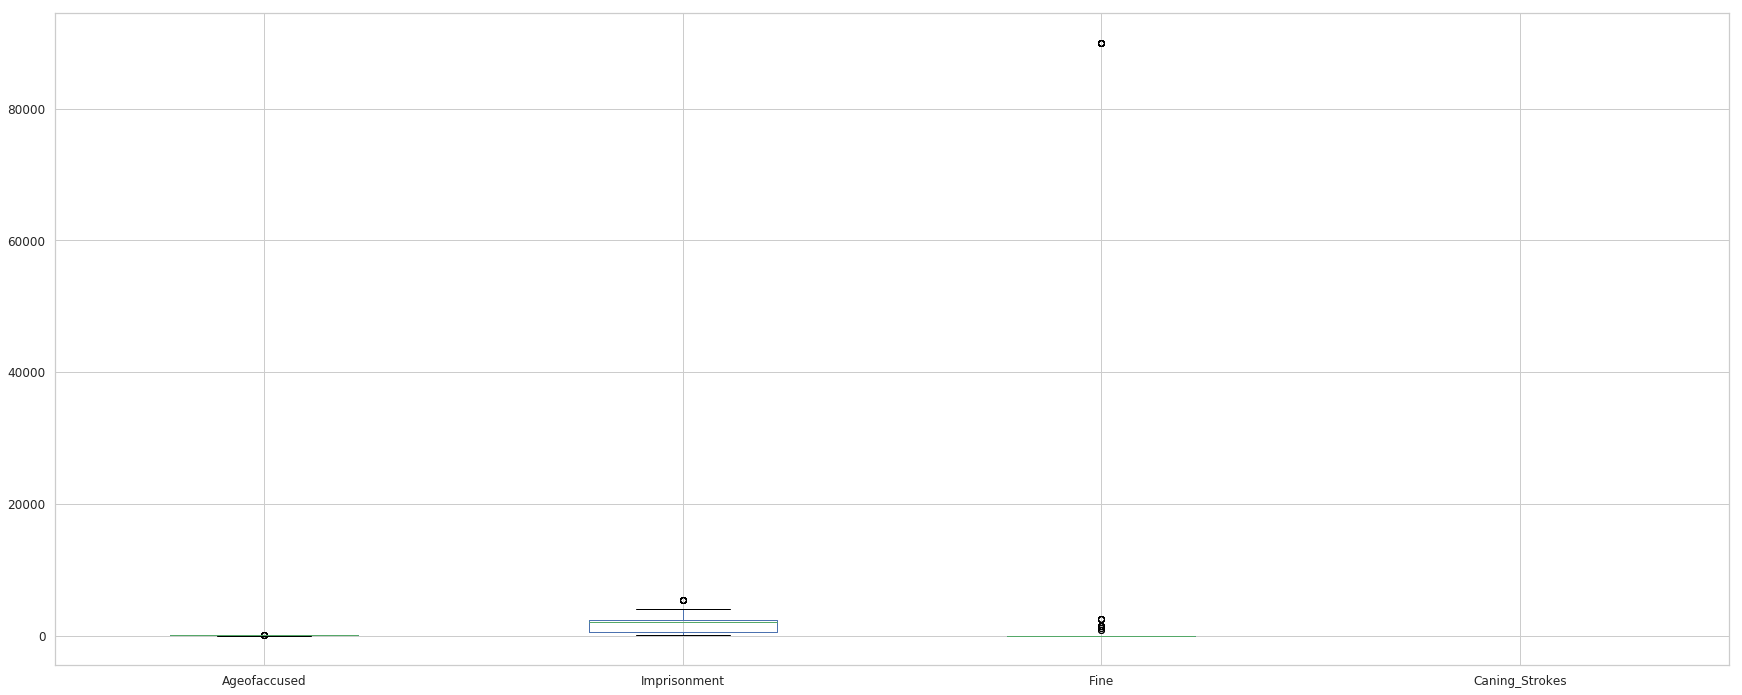

In [51]:
merged_data[numerical_cols].boxplot(figsize=(30,12))

In [52]:
merged_data.describe()

,Ageofaccused,Imprisonment,Fine,Caning_Strokes
count,483.000000,493.000000,493.000000,0.0
mean,34.627329,1820.312373,2805.070994,NaN
std,10.534563,1161.480615,15465.986633,NaN
min,21.000000,90.000000,0.000000,NaN
25%,26.000000,587.000000,0.000000,NaN
50%,32.000000,2065.000000,0.000000,NaN
75%,41.000000,2370.000000,0.000000,NaN
max,66.000000,5470.000000,90000.000000,NaN


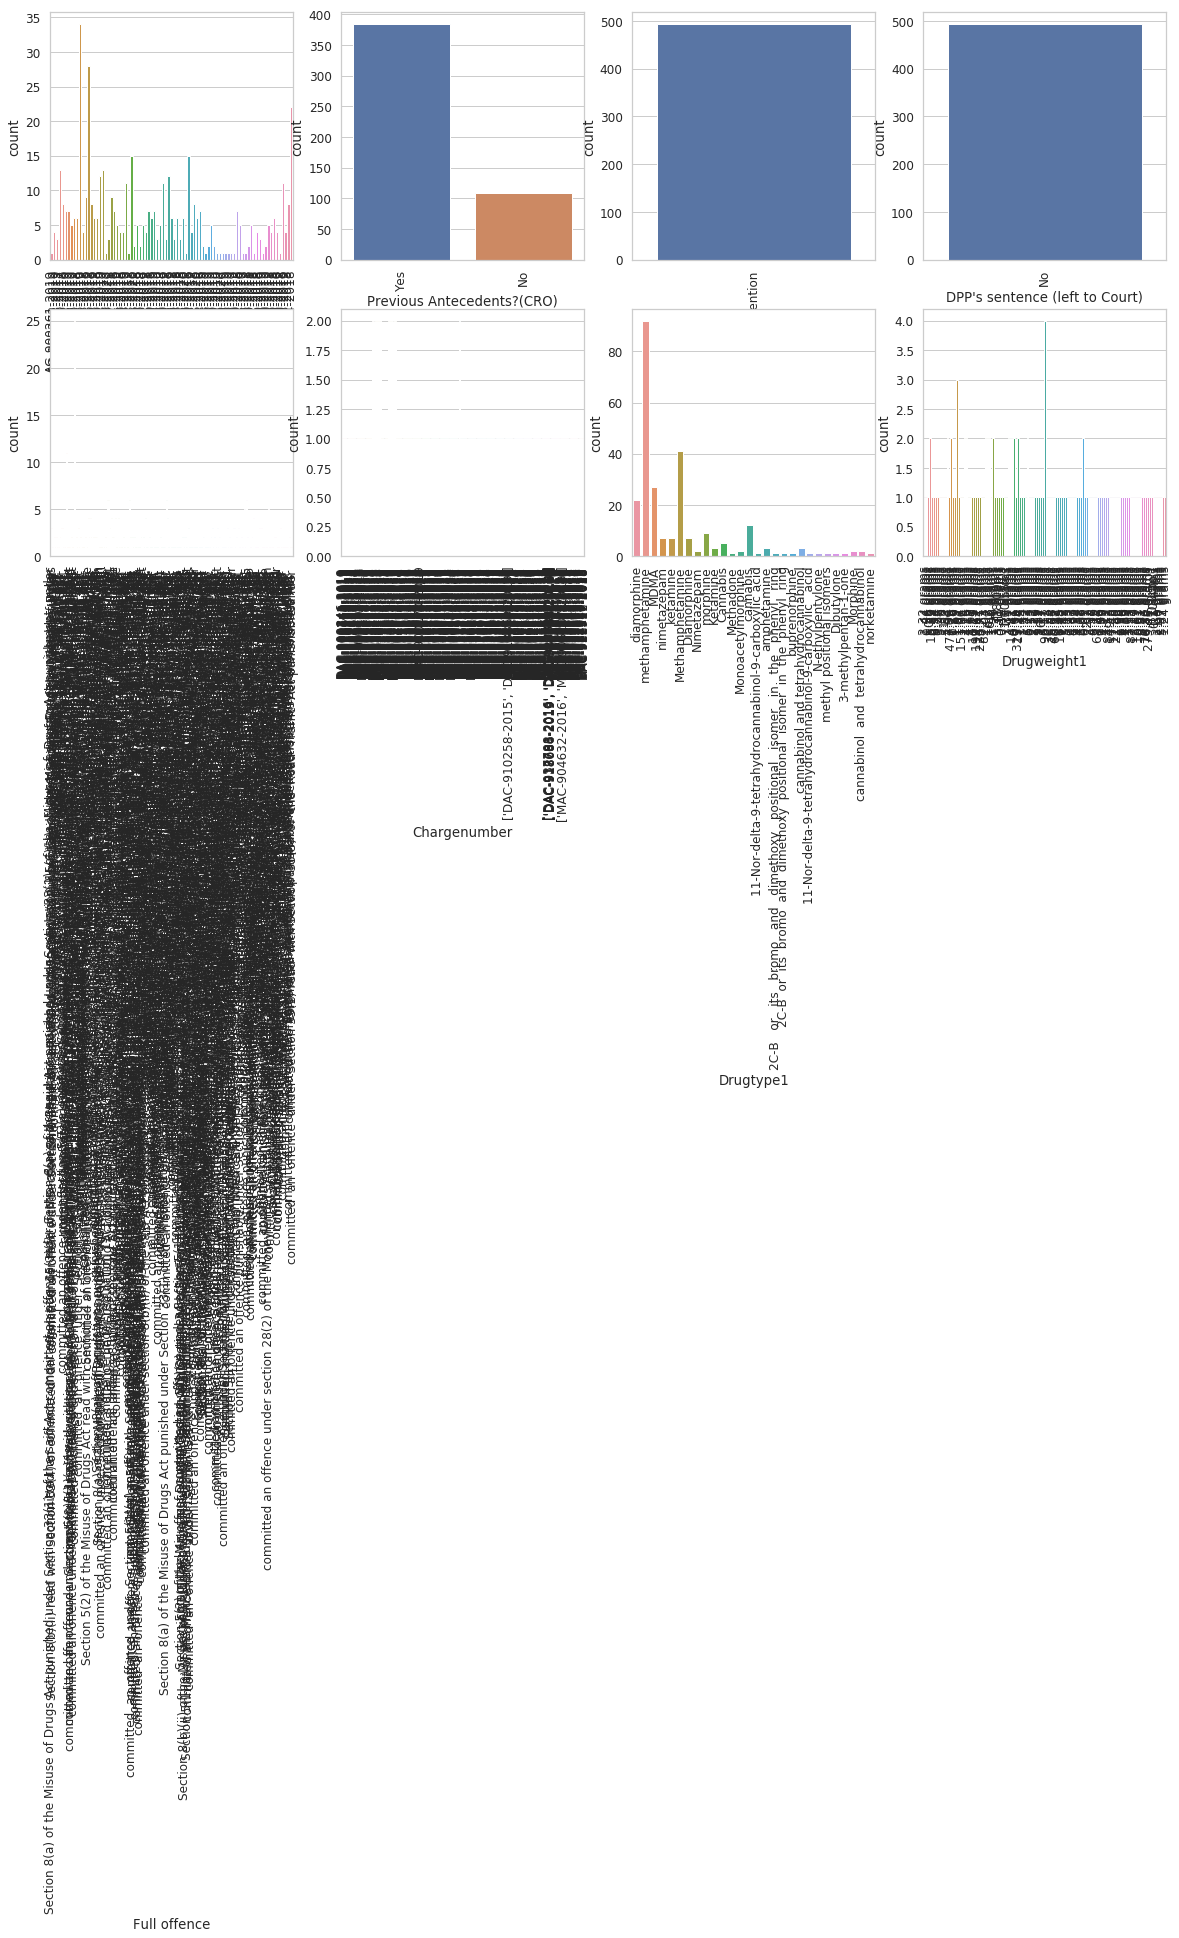

In [53]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical_cols, ax.flatten()):
    sns.countplot(merged_data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

### Related DrugType Handling and Drug Weight1


In [54]:
#merged_data['Full offence'][1]
def clean_related_drug_type(cols):
    import re
    try:
        word1 = " ".join(re.findall("[a-zA-Z]+", str(cols)))
        return  " ".join(set(word1.split()))
    except Exception as e:
        print(e) 

In [55]:
deal_data = merged_data.copy()

merged_data['Relateddrugtype'] = merged_data['Relateddrugtype'].replace(np.nan,"")
merged_data['Relateddrugtype'] = merged_data['Relateddrugtype'].apply(clean_related_drug_type)

merged_data['Drugweight1']= merged_data['Drugweight1'].apply(age_clean)
numerical_feature_mask = merged_data.dtypes!='object'
numerical_cols = merged_data.columns[numerical_feature_mask].tolist()
merged_data.loc[merged_data.Ageofaccused.isna(), 'Ageofaccused'] = merged_data['Ageofaccused'].median()
merged_data[numerical_cols] = merged_data[numerical_cols].fillna(0)

In [56]:
merged_data.columns

Index(['AG Number', 'Previous Antecedents?(CRO)', 'TrialORPG?',
       'DPP's sentence (left to Court)', 'Full offence', 'Ageofaccused',
       'Chargenumber', 'Drugtype1', 'Drugweight1', 'Genderofaccused',
       'Generaltypeofoffence', 'Identitynumber', 'Nationality',
       'Relateddrugtype', 'Imprisonment', 'Fine', 'Caning_Strokes'],
      dtype='object')

In [57]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dsxuser/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/dsxuser/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

### Text Cleaning and Transformation

In [58]:
merged_data['Full offence'] = merged_data['Full offence'].replace(np.nan," ")
merged_data['Full offence'].isna().sum()

0

In [59]:
merged_data.isna().sum()

AG Number                           0
Previous Antecedents?(CRO)          0
TrialORPG?                          0
DPP's sentence (left to Court)      0
Full offence                        0
Ageofaccused                        0
Chargenumber                        1
Drugtype1                         236
Drugweight1                         0
Genderofaccused                     1
Generaltypeofoffence                1
Identitynumber                      4
Nationality                         2
Relateddrugtype                     0
Imprisonment                        0
Fine                                0
Caning_Strokes                      0
dtype: int64

## Feature Engineering and Feature Creation/Selection

In [60]:
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
from sklearn.compose import ColumnTransformer
from gensim.parsing import preprocessing as pp
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer,HashingVectorizer,CountVectorizer

clean_df = merged_data.copy()


lemmatizer = WordNetLemmatizer()


pp_list_new = [
    lambda x: x.lower(),
    pp.strip_tags,
    pp.strip_multiple_whitespaces,
    pp.strip_punctuation,
    pp.strip_short,
    pp.remove_stopwords,
    pp.strip_numeric
          ]

def test_tokenizer(line):
    tokens = pp.preprocess_string(line, filters=pp_list_new)
    tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens]
    return "  ".join(tokens)


def labelencode(clean_df):
    for f in clean_df.columns:
        if clean_df[f].dtype == 'object' and f not in ['Full offence',"Relateddrugtype"]:
            label = LabelEncoder()
            label.fit(list(clean_df[f].values))
            clean_df[f] = label.transform(list(clean_df[f].values))
    return clean_df



In [61]:
clean_df= clean_df.drop(['AG Number','Chargenumber','Identitynumber','TrialORPG?'],axis=1)
clean_df['Caning_Strokes'] = clean_df['Caning_Strokes'].replace(np.nan,0)
clean_df['Drugweight1']= clean_df['Drugweight1'].apply(age_clean)

clean_df['Full offence'] = clean_df['Full offence'].apply(lambda x:test_tokenizer(x))

clean_df = labelencode(clean_df)

vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2',ngram_range=(1,1))
#vectorizer = HashingVectorizer(n_features=10000,norm=None,alternate_sign=False) 

offence_vec = vectorizer.fit_transform(clean_df['Full offence'])

df1 = pd.DataFrame(offence_vec.toarray(), columns=vectorizer.get_feature_names())

clean_df.drop(['Full offence'], axis=1, inplace=True)
clean_df = pd.concat([clean_df, df1], axis=1)

## Related Drug Feature Vectorizer
offence_vec_rdt = vectorizer.fit_transform(clean_df['Relateddrugtype'])
print(vectorizer.inverse_transform(offence_vec_rdt[1]))
df2 = pd.DataFrame(offence_vec_rdt.toarray(), columns=vectorizer.get_feature_names())
clean_df = pd.concat([clean_df, df2], axis=1)
clean_df.drop(['Relateddrugtype'], axis=1, inplace=True)

#clean_df = clean_df.drop(['DPP_Imprisonment',"DPP's Fine","DPP's Caning (Strokes)"],axis =1)

[array(['vegetable', 'matter'], dtype='<U11')]


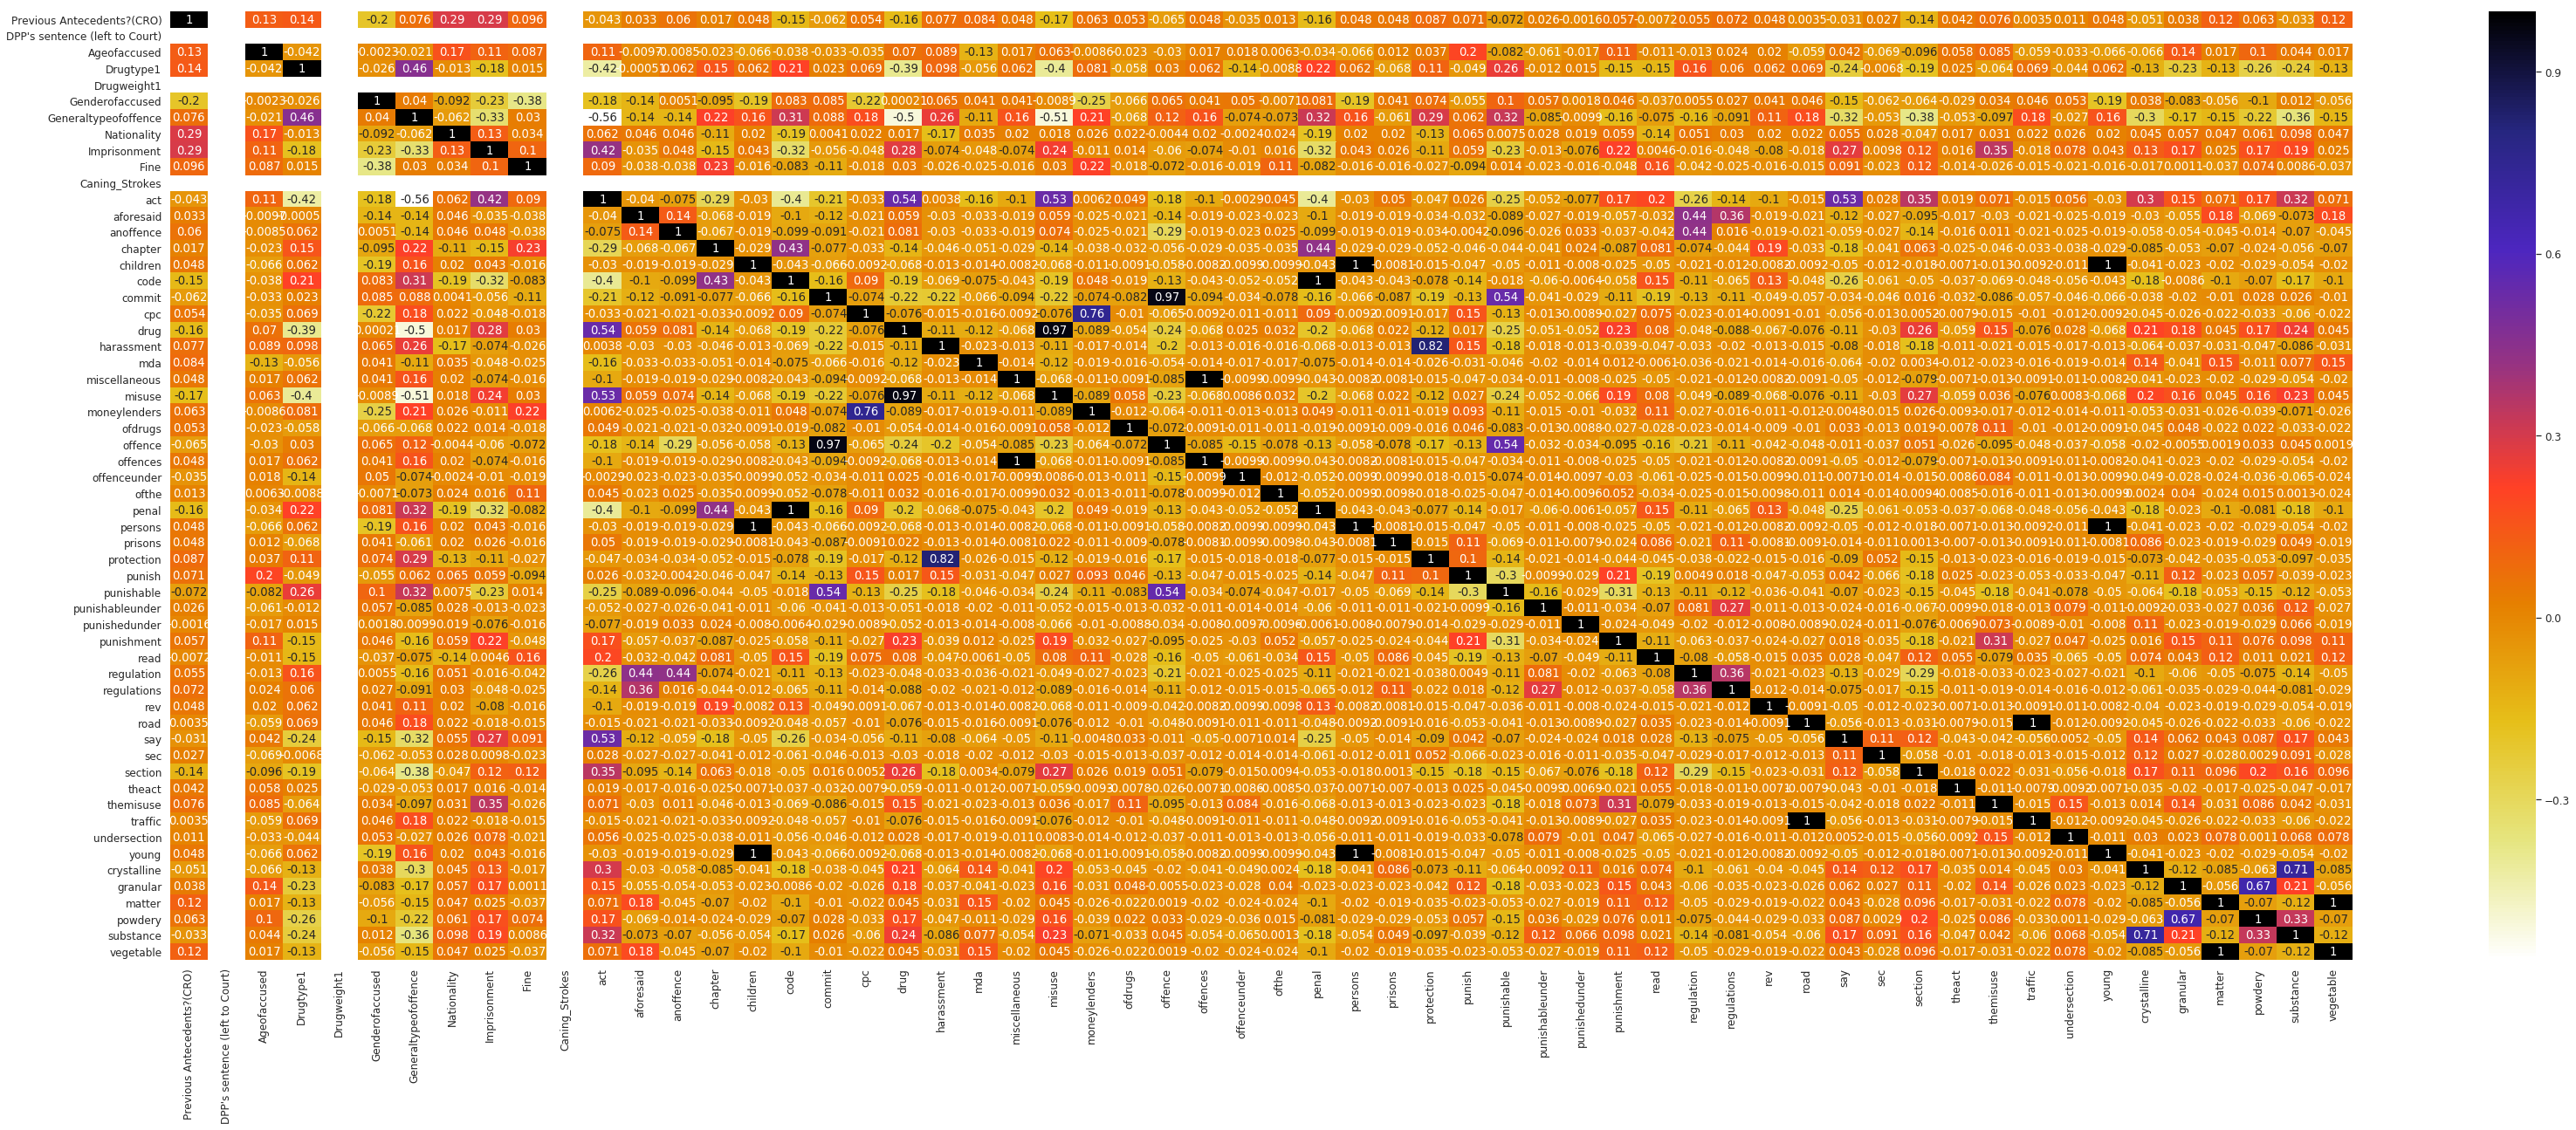

In [62]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
corr = clean_df.corr()
plt.figure(figsize=(56,20))
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [63]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [64]:
col_corr = correlation(clean_df,0.2)

In [65]:
clean_df.columns

Index(['Previous Antecedents?(CRO)', 'DPP's sentence (left to Court)',
       'Ageofaccused', 'Drugtype1', 'Drugweight1', 'Genderofaccused',
       'Generaltypeofoffence', 'Nationality', 'Imprisonment', 'Fine',
       'Caning_Strokes', 'act', 'aforesaid', 'anoffence', 'chapter',
       'children', 'code', 'commit', 'cpc', 'drug', 'harassment', 'mda',
       'miscellaneous', 'misuse', 'moneylenders', 'ofdrugs', 'offence',
       'offences', 'offenceunder', 'ofthe', 'penal', 'persons', 'prisons',
       'protection', 'punish', 'punishable', 'punishableunder',
       'punishedunder', 'punishment', 'read', 'regulation', 'regulations',
       'rev', 'road', 'say', 'sec', 'section', 'theact', 'themisuse',
       'traffic', 'undersection', 'young', 'crystalline', 'granular', 'matter',
       'powdery', 'substance', 'vegetable'],
      dtype='object')

In [66]:
# def read_process_feature(df):
    
#     df= df[merged_data['TrialORPG?']=='Mention']
#     merged_data["Imprisonment"] = merged_data['Imprisonment (Years)']*365 +merged_data["Imprisonment (Months)"]*30 + merged_data["Imprisonment (Weeks)"]*7+merged_data["Imprisonment (Days)"]
#     merged_data["DPP_Imprisonment"] = merged_data["DPP's Imprisonment (Years)"]*365 +merged_data["DPP's Imprisonment (Months)"]*30 + merged_data["DPP's Imprisonment (Weeks)"]*7+merged_data["DPP's Imprisonment (Days)"]



    
    

## Model Training ,Cross Validation & Testing

In [67]:
target = ['Imprisonment','Fine','Caning_Strokes']
X = clean_df.drop(target, axis=1) 
Y = clean_df[target]

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.20, random_state=42)

print(X_train.shape,X_test.shape)

(394, 55) (99, 55)


In [68]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold,KFold,RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from numpy import absolute
from numpy import mean
from numpy import std
import lightgbm as lgb
from lightgbm import LGBMRegressor

def get_best_model_fit(X_train,Y_train,X_test,Y_test):  
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
    model = XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
    
    ridge = Ridge()
    rfregressor = RandomForestRegressor()
    knnregressor = KNeighborsRegressor()
    extratrees = ExtraTreesRegressor()
    Gbm = GradientBoostingRegressor()
    adaboost = AdaBoostRegressor()
   

    lgbregressor = LGBMRegressor(random_state=101)
    models = [model,ridge,rfregressor,lgbregressor,knnregressor]

    score_dicts = {}
    feature_imps = {}

    for each in models:
        try:
            mor_model = MultiOutputRegressor(each)
            n_scores = cross_val_score(mor_model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

            mor_model.fit(X_train,Y_train)
            predictions = mor_model.predict(X_test)
            score = r2_score(Y_test,predictions)

            #feature_importance

            feature_imp = pd.DataFrame(sorted(zip(mor_model.estimators_[0].feature_importances_,X.columns)), columns=['Value','Feature'])

            # force the scores to be positive

            n_scores = absolute(n_scores)

            # Score_dict
            each = str(type(each))
            each = each.split(".")[-1]
            score_dicts[each] = score
            feature_imps[each] = feature_imp
            
        except Exception as e:
            pass

    return score_dicts,feature_imps

In [69]:
import operator
score_dicts,feature_imps = get_best_model_fit(X_train,Y_train,X_test,Y_test)
best_model = max(score_dicts.items(), key=operator.itemgetter(1))[0]
best_model

"LGBMRegressor'>"

In [70]:
score_dicts

{"XGBRegressor'>": 0.440579468090242,
 "RandomForestRegressor'>": 0.7453126968462768,
 "LGBMRegressor'>": 0.8239600338063492}

In [71]:
feature_imps.keys()

dict_keys(["XGBRegressor'>", "RandomForestRegressor'>", "LGBMRegressor'>"])

### Feature importance LGBM

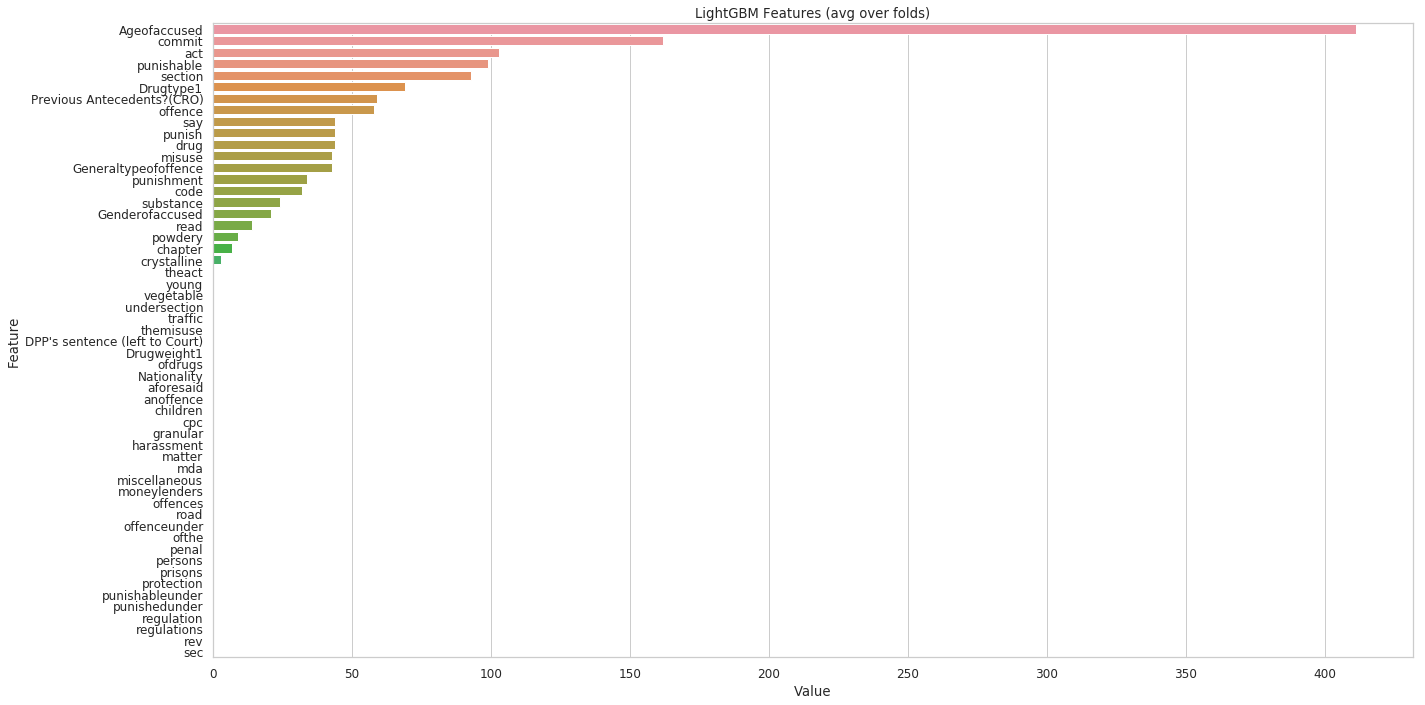

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
# feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,X.columns)), columns=['Value','Feature'])

feature_imp = feature_imps['LGBMRegressor\'>']

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
# plt.savefig('lgbm_importances-01.png')

### Default Multiregressor : RF

In [73]:
# Various hyper-parameters to tune
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state= 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf.fit(X_train, Y_train)

from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score
predictions = rf.predict(X_test)

score = r2_score(Y_test,predictions)
score

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


0.7672524335394891

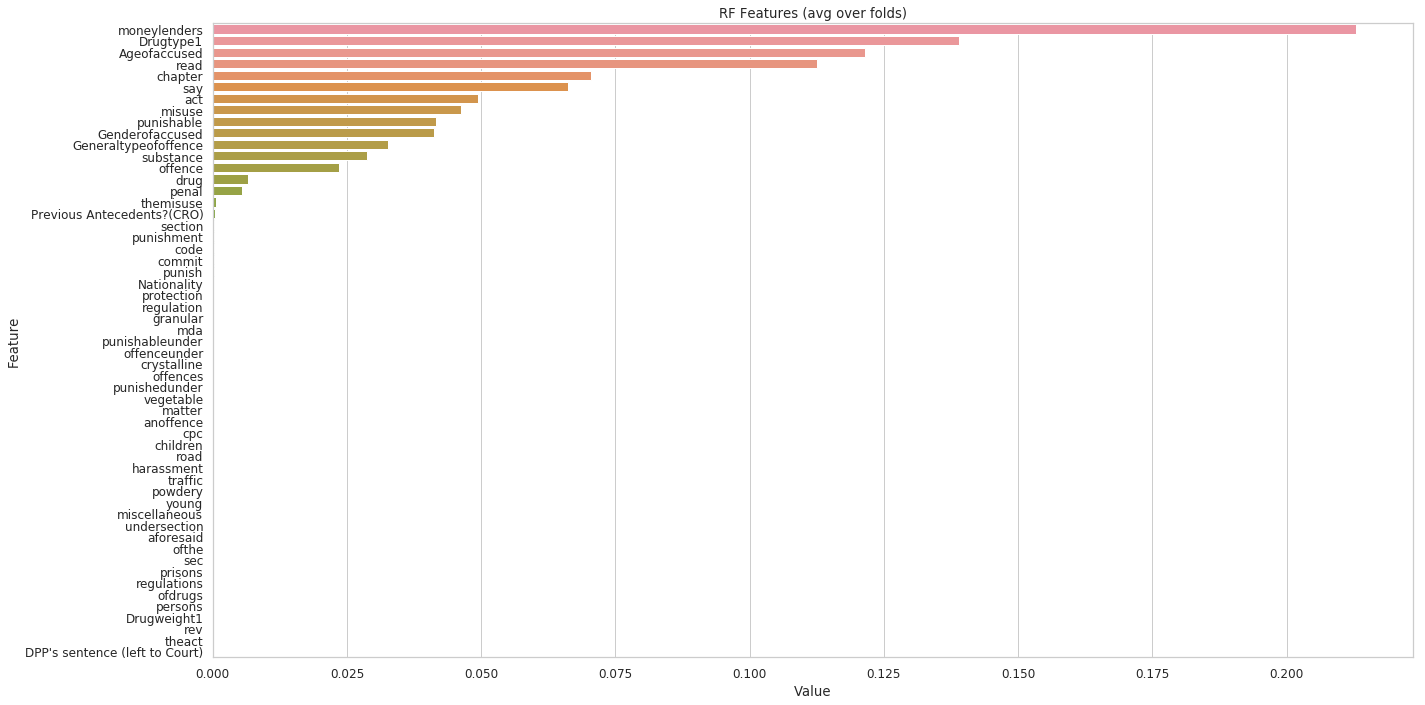

In [74]:
feature_imp = pd.DataFrame(sorted(zip(rf.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('RF Features (avg over folds)')
plt.tight_layout()
plt.show()

In [75]:
def preprocess_data(df):

    from nltk.stem import WordNetLemmatizer
    from collections import defaultdict
    from sklearn.compose import ColumnTransformer
    from gensim.parsing import preprocessing as pp
    from sklearn.preprocessing import LabelEncoder
    from sklearn.feature_extraction.text import TfidfVectorizer,HashingVectorizer,CountVectorizer
    import nltk
    
    nltk.download('stopwords')
    nltk.download('wordnet')



    df= df[df['TrialORPG?']=='Mention']
    df["Imprisonment"] = df['Imprisonment (Years)']*365 +df["Imprisonment (Months)"]*30 + df["Imprisonment (Weeks)"]*7+df["Imprisonment (Days)"]
    drop_cols = ['Imprisonment (Years)',"Imprisonment (Months)","Imprisonment (Weeks)","Imprisonment (Days)","DPP's Imprisonment (Years)","DPP's Imprisonment (Months)",
            "DPP's Imprisonment (Weeks)","DPP's Imprisonment (Days)","Reportnumber","Hsalabnumber1","Other Sentence","DPP's Other Sentence","DPP's Caning (Strokes)",
            "DPP's Fine"]
             
    df.drop(drop_cols,axis=1,inplace=True)
    new_column_names = ['AG Number','Accused Name','Previous Antecedents?(CRO)','TrialORPG?',"DPP's sentence (left to Court)",
                    'Firstpartofoffence','Offenceconnector','Secondpartofoffence','Full offence','Ageofaccused',
                    'Chargenumber','Dateofbirth','Dateofoffence','Drugtype1','Drugweight1','Genderofaccused','Generaltypeofoffence','Identitynumber','Nationality',
                    'Relateddrugtype','Imprisonment','Fine','Caning_Strokes']
    df = df.reindex(columns=new_column_names)

    def age_clean(cols):
        import re
        if type(cols) == str:
            match = re.search(r'\w+',cols)
            return int(match.group(0))

    df= df.reset_index(drop=True)

    df['Dateofbirth'] = df['Dateofbirth'].apply(lambda x:x[-4:] if type(x)==str else x)
    df['Dateofoffence'] = df['Dateofoffence'].apply(lambda x:x[-4:] if type(x)==str else x)

    df['Dateofbirth'] = df['Dateofbirth'].astype(float)
    df['Dateofoffence'] = df['Dateofoffence'].astype(float)

    df['Ageofaccused'] = df['Ageofaccused'].apply(age_clean)
    df['test'] = df['Ageofaccused']

    df['test'] =df['Dateofoffence']-df['Dateofbirth']
    df['Ageofaccused'].fillna(df.test, inplace=True)
    df.drop(['test','Dateofoffence','Dateofbirth','Firstpartofoffence','Offenceconnector','Secondpartofoffence','Accused Name'],axis=1,inplace=True)

    # ### Age manipulation

    age_dict= {"AG-123344-2018" : 28,"AG-123403-2019" : 52,"AG-123150-2018" : 26}
    charge_dict= {"DAC-918469-2019":52,"DAC-918470-2019":52,"DAC-901158-2019":52,"MAC-906285-2019":26,'MAC-906709-2018':28,"MAC-906708-2018":28}

    for key in charge_dict.keys():
        df.loc[df.Chargenumber == key,'Ageofaccused'] = charge_dict[key]
        
    df[df['Ageofaccused'] <20]

    dicts= {}
    from collections import Counter
    list_ages = set(df[df['Ageofaccused'].isna()]['AG Number'])
    unique_list_ages = list(list_ages)
    for columns in unique_list_ages:
        value_list= df[df['AG Number'] ==str(columns)]['Ageofaccused']
        b = Counter(value_list)
        value = b.most_common(1)[0][0]
        if not pd.isnull(value):
            dicts[columns] = value
    for key in dicts.keys():
        df.loc[df['AG Number'] == key,'Ageofaccused'] = dicts[key]

    #df['Full offence'][1]
    def clean_related_drug_type(cols):
        import re
        try:
            word1 = " ".join(re.findall("[a-zA-Z]+", str(cols)))
            return  " ".join(set(word1.split()))
        except Exception as e:
            print(e) 

    df['Relateddrugtype'] = df['Relateddrugtype'].replace(np.nan,"")
    df['Relateddrugtype'] = df['Relateddrugtype'].apply(clean_related_drug_type)

    df['Drugweight1']= df['Drugweight1'].apply(age_clean)
    numerical_feature_mask = df.dtypes!='object'
    numerical_cols = df.columns[numerical_feature_mask].tolist()
    df.loc[df.Ageofaccused.isna(), 'Ageofaccused'] = df['Ageofaccused'].median()
    df[numerical_cols] = df[numerical_cols].fillna(0)
    df['Full offence'] = df['Full offence'].replace(np.nan," ")
    
    return df


def feature_creation(clean_df):
    # ### Text Cleaning and Transformation

    #clean_df = feature_df.copy()

    lemmatizer = WordNetLemmatizer()


    pp_list_new = [
        lambda x: x.lower(),
        pp.strip_tags,
        pp.strip_multiple_whitespaces,
        pp.strip_punctuation,
        pp.strip_short,
        pp.remove_stopwords,
        pp.strip_numeric
              ]

    def test_tokenizer(line):
        tokens = pp.preprocess_string(line, filters=pp_list_new)
        tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens]
        return "  ".join(tokens)


    def labelencode(clean_df):
        for f in clean_df.columns:
            if clean_df[f].dtype == 'object' and f not in ['Full offence',"Relateddrugtype"]:
                label = LabelEncoder()
                label.fit(list(clean_df[f].values))
                clean_df[f] = label.transform(list(clean_df[f].values))
        return clean_df



    clean_df= clean_df.drop(['AG Number','Chargenumber','Identitynumber','TrialORPG?'],axis=1)
    clean_df['Caning_Strokes'] = clean_df['Caning_Strokes'].replace(np.nan,0)
    clean_df['Drugweight1']= clean_df['Drugweight1'].apply(age_clean)

    clean_df['Full offence'] = clean_df['Full offence'].apply(lambda x:test_tokenizer(x))

    clean_df = labelencode(clean_df)

    vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2',ngram_range=(1,1))
    #vectorizer = HashingVectorizer(n_features=10000,norm=None,alternate_sign=False) 

    offence_vec = vectorizer.fit_transform(clean_df['Full offence'])

    df1 = pd.DataFrame(offence_vec.toarray(), columns=vectorizer.get_feature_names())

    clean_df.drop(['Full offence'], axis=1, inplace=True)
    clean_df = pd.concat([clean_df, df1], axis=1)

    ## Related Drug Feature Vectorizer
    offence_vec_rdt = vectorizer.fit_transform(clean_df['Relateddrugtype'])
    print(vectorizer.inverse_transform(offence_vec_rdt[1]))
    df2 = pd.DataFrame(offence_vec_rdt.toarray(), columns=vectorizer.get_feature_names())
    clean_df = pd.concat([clean_df, df2], axis=1)
    clean_df.drop(['Relateddrugtype'], axis=1, inplace=True)
    return clean_df


    
def model_train_test(model_df):

    from sklearn.model_selection import train_test_split
    from sklearn.pipeline import Pipeline
    from xgboost import XGBRegressor
    from sklearn.multioutput import MultiOutputRegressor
    from sklearn.linear_model import Ridge
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import RepeatedKFold,KFold,RepeatedStratifiedKFold
    from sklearn.ensemble import ExtraTreesRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.ensemble import AdaBoostRegressor
    from numpy import absolute
    from numpy import mean
    from numpy import std
    import lightgbm as lgb
    from lightgbm import LGBMRegressor

    # ## Model Training ,Cross Validation & Testing
    target = ['Imprisonment','Fine','Caning_Strokes']
    X = model_df.drop(target, axis=1) 
    Y = model_df[target]

    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.20, random_state=42)
 
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

    model = XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
    
    ridge = Ridge()
    rfregressor = RandomForestRegressor()
    knnregressor = KNeighborsRegressor()
    extratrees = ExtraTreesRegressor()
    Gbm = GradientBoostingRegressor()
    adaboost = AdaBoostRegressor()
    lgbregressor = LGBMRegressor(random_state=101)
    models = [model,ridge,rfregressor,lgbregressor,knnregressor]

    score_dicts = {}
    feature_imps = {}

    for each in models:
        try:
            mor_model = MultiOutputRegressor(each)
            n_scores = cross_val_score(mor_model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

            mor_model.fit(X_train,Y_train)
            predictions = mor_model.predict(X_test)
            score = r2_score(Y_test,predictions)

            #feature_importance

            feature_imp = pd.DataFrame(sorted(zip(mor_model.estimators_[0].feature_importances_,X.columns)), columns=['Value','Feature'])

            # force the scores to be positive

            n_scores = absolute(n_scores)

            # Score_dict
            each = str(type(each))
            each = each.split(".")[-1]
            score_dicts[each] = score
            feature_imps[each] = feature_imp
            
        except Exception as e:
            pass

    return score_dicts,feature_imps








In [76]:
clean_df_new = preprocess_data(UC2Output)
clean_df_new.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dsxuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/dsxuser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,AG Number,Previous Antecedents?(CRO),TrialORPG?,DPP's sentence (left to Court),Full offence,Ageofaccused,Chargenumber,Drugtype1,Drugweight1,Genderofaccused,Generaltypeofoffence,Identitynumber,Nationality,Relateddrugtype,Imprisonment,Fine,Caning_Strokes
0,AG-900261-2019,Yes,Mention,No,,32.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,,300,0,0.0
1,AG-123272-2019,Yes,Mention,No,Section 8(a) of the Misuse of Drugs Act punish...,55.0,DAC-909846-2019,diamorphine,2.0,Male,Drug,S9898247H,Singapore,vegetable matter,1060,0,0.0
2,AG-123272-2019,Yes,Mention,No,committed an offence under regulation 15(3...,56.0,DAC-900742-2019,NaN,0.0,Male,Drug,S9898247H,Singapore,,1060,0,0.0
3,AG-123272-2019,Yes,Mention,No,committed an offence under regulation 15(3...,55.0,DAC-900741-2019,NaN,0.0,Male,Drug,S9898247H,Singapore,,1060,0,0.0
4,AG-123272-2019,Yes,Mention,No,committed an offence under regulation 15(3...,56.0,DAC-900743-2019,NaN,0.0,Male,Drug,S9898247H,Singapore,,1060,0,0.0


In [77]:
model_df = feature_creation(clean_df_new)
score_dicts,feature_imps = model_train_test(model_df)
score_dicts

[array(['vegetable', 'matter'], dtype='<U11')]


{"XGBRegressor'>": 0.440579468090242,
 "RandomForestRegressor'>": 0.696151661985872,
 "LGBMRegressor'>": 0.8239600338063492}